/Users/yukiharuta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


T0: 21.3767, Tend: 40.6191, k: 4.1604
R2: 0.9912


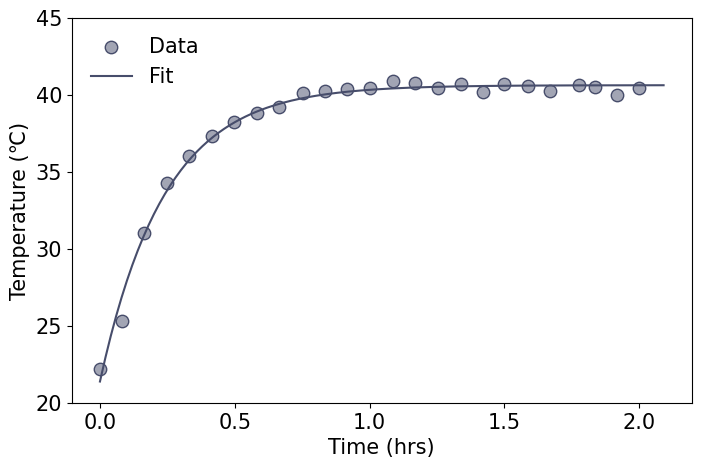

In [1]:
'''
Temperature Profile
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

save_option = True
figsavepath = "../Figures/FigureS2_temperature.svg"

path = "../Data/FigureS2_temperature/Temperature-stabilization.xlsx"

df = pd.read_excel(path)

X = df['Time'].to_list() # hour
Y = df['Temp (oC)'].to_list()

plt.rcParams["font.size"] = 15
fig = plt.figure(figsize=(8,5))

plt.scatter(X, Y, c='#474D6B80',ec='#474D6B', label='Data', s=80, zorder=2)

def temp_in_solution(time,T0,Tend,k):
    y = Tend + (T0 - Tend) * np.exp(-k * time) # time (hrs), temp (oC), based on Figure S2
    return y

T0_guess = Y[0]
Tend_guess = Y[-1]
k_guess = 4.16

# fit the PearsonVII function to the data
popt, pcov = curve_fit(temp_in_solution, X, Y, p0=[T0_guess, Tend_guess, k_guess])
    
X_fit = np.arange(0,2.1,0.01)
Y_fit = temp_in_solution(X_fit, *popt)
Y_fit2 = [temp_in_solution(n, popt[0], popt[1], popt[2]) for n in X]
plt.plot(X_fit,Y_fit,c="#474D6B", label='Fit',zorder=1)
plt.xlabel('Time (hrs)')
plt.ylabel('Temperature (℃)')
plt.ylim(20,45)
plt.legend(frameon=False)
R2 = r2_score(Y, Y_fit2)

print(f'T0: {popt[0]:.4f}, Tend: {popt[1]:.4f}, k: {popt[2]:.4f}')
print(f'R2: {R2:.4f}')

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')